### Clarence Barron

### Date: March 16th, 2023


### 1) Manual BP using equations derived in class. Use both Relu and Sigmoid activation for the hidden layer. Show output converged to very close to [0, 1, 1, 0]. 

### Hint: Initialize W's and b's to non-zero random numbers. 
### Which activation worked better for this problem?

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
import keras
import tensorflow as tf

In [13]:
m = 4

w11 = np.array([[8.6], [4.8]])  
w12 = np.array([[1.3], [3.4]]) 
b11 = 5.1
b12 = -2.4

w21 = 9.8
w22 = -3.6
b21 = 0.50

W1 = np.concatenate((w11.T, w12.T), axis=0)
b1 = np.array([[b11], [b12]])
W2 = np.array([[w21], [w22]]).T
b2 = b21

In [14]:
W1 = np.concatenate((w11.T, w12.T), axis=0)
b1 = np.array([[b11], [b12]])
W2 = np.array([[w21], [w22]]).T
b2 = b21

In [15]:
def Sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [16]:
def dSigmoid(x):
    s = Sigmoid(x)
    ds = s*(1-s)
    return ds

In [17]:
def dRelu(z):
    return np.where(z <= 0, 0, 1)

In [18]:
def Relu(z):
    return np.maximum(z,0)

In [19]:
m=4

x1 = np.array([[0], [0]])
x2 = np.array([[0], [1]])
x3 = np.array([[1], [0]])
x4 = np.array([[1], [1]])
X = np.concatenate((x1, x2, x3, x4), axis=1) 
Y = np.array([0, 1, 1, 0])

The output of A2 is: [[0. 1. 1. 0.]]


Z:\Anaconda\envs\CPE4903\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
Z:\Anaconda\envs\CPE4903\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


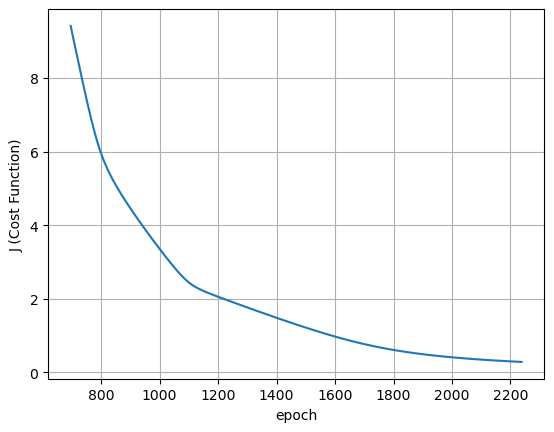

In [20]:
alpha = .0015
epoch = 2250
J = np.zeros((epoch,1))

for i in range(epoch):
    #Forward Propagation
    Z1 = np.dot(W1,X) + b1
    A1 = Relu(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = Sigmoid(Z2)
    L = -((Y * np.log(A2)) + ((1-Y) * np.log(1-A2)))
    J[i] = (1/m) * np.sum(L)

    #Backward Propagation
    dZ2 = (A2 - Y)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * dRelu(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1

print('The output of A2 is:', np.rint(A2))
plt.plot(J[10:-1])
plt.xlabel('epoch')
plt.ylabel('J (Cost Function)')
plt.grid()

### The Relu activation gets the closest to the converged output.

### 2) Use Keras and achieve best possible results. You may or may converge to the desired output [0, 1, 1, 0]

In [21]:
X_ker = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
Y_ker = np.array([[0],[1],[1],[0]])

In [22]:
n1 = 2
n2 = 2
n3 = 1

model = Sequential()
model.add(Dense(units=n1,activation='relu',input_dim=2))
model.add(Dense(units=n2,activation='relu')) 
model.add(Dense(units=n3,activation='sigmoid'))
sgd=tf.keras.optimizers.SGD(learning_rate=.1)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_ker,Y_ker,epochs=600,batch_size=4,verbose=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/600
1/1 [==============================] - 0s 428ms/step - loss: 0.7916 - accuracy: 0.7500
Epoch 2/600
1/1 [==============================] - 0s 2ms/step - loss: 0.7514 - accuracy: 0.7500
Epoch 3/600
1/1 [==============================] - 0s 3ms/step - loss: 0.7203 - accuracy: 0.7500
Epoch 4/600
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.7500
Epoch 77/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7500
Epoch 78/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7500
Epoch 79/600
1/1 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7500
Epoch 80/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7500
Epoch 81/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7500
Epoch 82/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7500
Epoch 83/600
1/1 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7500
Epoch 84/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7500
Epoch 85/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.7500
Epoch 86/600
1/1 [===============

1/1 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 1.0000
Epoch 160/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 1.0000
Epoch 161/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 1.0000
Epoch 162/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 1.0000
Epoch 163/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 1.0000
Epoch 164/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 1.0000
Epoch 165/600
1/1 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 1.0000
Epoch 166/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 1.0000
Epoch 167/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 1.0000
Epoch 168/600
1/1 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 1.0000
Epoch 169/600
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 1.0000
Epoch 242/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 1.0000
Epoch 243/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 1.0000
Epoch 244/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 1.0000
Epoch 245/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 1.0000
Epoch 246/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 1.0000
Epoch 247/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 1.0000
Epoch 248/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 1.0000
Epoch 249/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 1.0000
Epoch 250/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 1.0000
Epoch 251/600
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 1.0000
Epoch 324/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 1.0000
Epoch 325/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 1.0000
Epoch 326/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 1.0000
Epoch 327/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 1.0000
Epoch 328/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 1.0000
Epoch 329/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 1.0000
Epoch 330/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 1.0000
Epoch 331/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 1.0000
Epoch 332/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 1.0000
Epoch 333/600
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 1.0000
Epoch 406/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 1.0000
Epoch 407/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 1.0000
Epoch 408/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 1.0000
Epoch 409/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 1.0000
Epoch 410/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 1.0000
Epoch 411/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 1.0000
Epoch 412/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 1.0000
Epoch 413/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 1.0000
Epoch 414/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 1.0000
Epoch 415/600
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 488/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 1.0000
Epoch 489/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 1.0000
Epoch 490/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 1.0000
Epoch 491/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 1.0000
Epoch 492/600
1/1 [==============================] - 0s 999us/step - loss: 0.0337 - accuracy: 1.0000
Epoch 493/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 1.0000
Epoch 494/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 1.0000
Epoch 495/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 1.0000
Epoch 496/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 497/600
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 570/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 571/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 572/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 1.0000
Epoch 573/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 1.0000
Epoch 574/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 1.0000
Epoch 575/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 576/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 577/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 578/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 1.0000
Epoch 579/600
1/1 [=====

In [23]:
Y_predict = model.predict(X_ker)
print(np.rint(Y_predict))

1/1 [==============================] - 0s 65ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


### 3) With Keras model, increase hidden layer, n1, to 4 or higher and observe the results. 

In [24]:
X_ker2 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
Y_ker2 = np.array([[0],[1],[1],[0]])

In [35]:
n1_2 = 4
n2_2 = 2
n3_2 = 1

model = Sequential()
model.add(Dense(units=n1_2, activation='relu', input_dim=2))
model.add(Dense(units=n2_2, activation='relu'))
model.add(Dense(units=n3_2, activation='sigmoid'))
sgd=tf.keras.optimizers.SGD(learning_rate=.1)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_ker2,Y_ker2,epochs=600,batch_size=4,verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 12        
                                                                 
 dense_19 (Dense)            (None, 2)                 10        
                                                                 
 dense_20 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/600
1/1 [==============================] - 0s 276ms/step - loss: 0.6833 - accuracy: 0.5000
Epoch 2/600
1/1 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.2500
Epoch 3/600
1/1 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.5000
Epoch 4/600
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 1.0000
Epoch 77/600
1/1 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 1.0000
Epoch 78/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 1.0000
Epoch 79/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 1.0000
Epoch 80/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 1.0000
Epoch 81/600
1/1 [==============================] - 0s 3ms/step - loss: 0.4536 - accuracy: 1.0000
Epoch 82/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 1.0000
Epoch 83/600
1/1 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 1.0000
Epoch 84/600
1/1 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 1.0000
Epoch 85/600
1/1 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 1.0000
Epoch 86/600
1/1 [===============

1/1 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 1.0000
Epoch 160/600
1/1 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 1.0000
Epoch 161/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 1.0000
Epoch 162/600
1/1 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 1.0000
Epoch 163/600
1/1 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 1.0000
Epoch 164/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 1.0000
Epoch 165/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 1.0000
Epoch 166/600
1/1 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 1.0000
Epoch 167/600
1/1 [==============================] - 0s 3ms/step - loss: 0.2286 - accuracy: 1.0000
Epoch 168/600
1/1 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 1.0000
Epoch 169/600
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 1.0000
Epoch 242/600
1/1 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 1.0000
Epoch 243/600
1/1 [==============================] - 0s 3ms/step - loss: 0.1277 - accuracy: 1.0000
Epoch 244/600
1/1 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 1.0000
Epoch 245/600
1/1 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 1.0000
Epoch 246/600
1/1 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 1.0000
Epoch 247/600
1/1 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 1.0000
Epoch 248/600
1/1 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 1.0000
Epoch 249/600
1/1 [==============================] - 0s 2ms/step - loss: 0.1217 - accuracy: 1.0000
Epoch 250/600
1/1 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 1.0000
Epoch 251/600
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 1.0000
Epoch 324/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 1.0000
Epoch 325/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 1.0000
Epoch 326/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 1.0000
Epoch 327/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 1.0000
Epoch 328/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 1.0000
Epoch 329/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0775 - accuracy: 1.0000
Epoch 330/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 1.0000
Epoch 331/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 1.0000
Epoch 332/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 1.0000
Epoch 333/600
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 1.0000
Epoch 406/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 1.0000
Epoch 407/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 1.0000
Epoch 408/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 1.0000
Epoch 409/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 1.0000
Epoch 410/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 1.0000
Epoch 411/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 1.0000
Epoch 412/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 1.0000
Epoch 413/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 1.0000
Epoch 414/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 1.0000
Epoch 415/600
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 1.0000
Epoch 488/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 1.0000
Epoch 489/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 1.0000
Epoch 490/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 1.0000
Epoch 491/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 1.0000
Epoch 492/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 1.0000
Epoch 493/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 1.0000
Epoch 494/600
1/1 [==============================] - 0s 999us/step - loss: 0.0414 - accuracy: 1.0000
Epoch 495/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 1.0000
Epoch 496/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 1.0000
Epoch 497/600
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 1.0000
Epoch 570/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 1.0000
Epoch 571/600
1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 1.0000
Epoch 572/600
1/1 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 1.0000
Epoch 573/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 574/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 1.0000
Epoch 575/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 1.0000
Epoch 576/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 1.0000
Epoch 577/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 1.0000
Epoch 578/600
1/1 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 1.0000
Epoch 579/600
1/1 [=====

In [36]:
Y_predict2 = model.predict(X_ker2)
print(np.rint(Y_predict2))

1/1 [==============================] - 0s 42ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


#### When we change n1 to 4 and above, the observations shown really highlights that the more neurons(units) you add, the more accurate the model will be. At the very least, the loss and the accuracy reach a more defined state quicker than the first model, where at n1 = 2, the loss and accuracy looks like it still needed some more time to learn. 

#### However, another observation is that the model is not consistent upon multiple re-runs. Sometimes the accuracy can be on par and it could still not hit the target goal, but when you add more neurons, it has a higher chance to hit that target upon multiple re-runs, but it will still not be a guarantee. However, upon changing around n2 as well, the output got closer and closer. So, it goes to show that if you add more neurons to the layer, the more accurate it will be to a certain degree. If you add too many neurons, you are still going to miss the target. 

#### After multiple re-runs the model does start to converge more after re-running each time. It was actually interesting and mind blowing seeing the numbers hit the target after re-running the model a few times.